## General infomation about the dataset
1. Country column showing about 183 countries uniquely
2. Years in which deaths happened
3. Number of under-five deaths (thousands)4. Infant mortality rate (probability of dying between birth and age 1 per 1000 live births).1 Both persons
4. Number of under-five deaths (thousands).16. Neonatal mortality rate (per 1000 live births) - babies dying within 25 days of birth - Males
5. Number of under-five deaths (thousands).2 - Females
6. Number of infant deaths (thousands) - Both genders
7. Number of infant deaths (thousands).1 - Male	
8. Number of infant deaths (thousands).2 - Female
9. Number of neonatal deaths (thousands): Babies dying in first 28 days of birth - both genders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
death_data = pd.read_csv("Datasets/Number of deaths (thousands).csv")
death_data.head()

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237


In [3]:
death_data.rename(columns={'Unnamed: 0':'Country', "Unnamed: 1":"Year"}, inplace=True)

In [4]:
death_data.rename(columns =
                  {
                      "Number of under-five deaths (thousands)":"Both genders infants (1-5)",
                      "Number of under-five deaths (thousands).1":"Male infants (1-5)",
                      "Number of under-five deaths (thousands).2":"Female infants (1-5)",
                      "Number of infant deaths (thousands)":"Both genders (infants)",
                      "Number of infant deaths (thousands).1":"Male infants",
                      "Number of infant deaths (thousands).2":"Female infants",
                      "Number of neonatal deaths (thousands)":"neonatal_death"         

                  },inplace = True)

## Removing the first row of the dataset containing invalid columns

In [5]:
death_data = death_data.iloc[1: , :] 
death_data.head()

,Country,Year,Both genders infants (1-5),Male infants (1-5),Female infants (1-5),Both genders (infants),Male infants,Female infants,neonatal_death
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
5,Afghanistan,2014,86378,46509,39869,64808,35410,29398,49715


In [6]:
death_data.tail()

,Country,Year,Both genders infants (1-5),Male infants (1-5),Female infants (1-5),Both genders (infants),Male infants,Female infants,neonatal_death
1160,Zimbabwe,2017,22519,12419,10100,16015,9010,7005,9696
1161,Zimbabwe,2016,23326,12867,10459,16693,9396,7297,10235
1162,Zimbabwe,2015,25433,14001,11432,18006,10121,7885,10815
1163,Zimbabwe,2014,27058,14866,12192,19051,10707,8344,11447
1164,Zimbabwe,2013,29200,15984,13216,20265,11363,8902,12063


In [7]:
death_data.isna().sum()

Country                       0
Year                          0
Both genders infants (1-5)    0
Male infants (1-5)            0
Female infants (1-5)          0
Both genders (infants)        0
Male infants                  0
Female infants                0
neonatal_death                0
dtype: int64

In [8]:
death_data.columns

Index(['Country', 'Year', 'Both genders infants (1-5)', 'Male infants (1-5)',
       'Female infants (1-5)', 'Both genders (infants)', 'Male infants',
       'Female infants', 'neonatal_death'],
      dtype='object')

In [9]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 1 to 1164
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     1164 non-null   object
 1   Year                        1164 non-null   object
 2   Both genders infants (1-5)  1164 non-null   object
 3   Male infants (1-5)          1164 non-null   object
 4   Female infants (1-5)        1164 non-null   object
 5   Both genders (infants)      1164 non-null   object
 6   Male infants                1164 non-null   object
 7   Female infants              1164 non-null   object
 8   neonatal_death              1164 non-null   object
dtypes: object(9)
memory usage: 82.0+ KB


In [10]:
def convert_to_int(data, column):
    data[column] = data[column].astype("int64")

In [11]:
num_columns = ['Year', "Both genders infants (1-5)", "Male infants (1-5)", "Female infants (1-5)", 'Both genders (infants)', 'Male infants',
       'Female infants', 'neonatal_death'
]

In [12]:
for column in num_columns:
    convert_to_int(death_data, column)

In [13]:
death_data.dtypes

Country                       object
Year                           int64
Both genders infants (1-5)     int64
Male infants (1-5)             int64
Female infants (1-5)           int64
Both genders (infants)         int64
Male infants                   int64
Female infants                 int64
neonatal_death                 int64
dtype: object

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Both genders infants (1-5)'}>,
        <AxesSubplot:title={'center':'Male infants (1-5)'}>],
       [<AxesSubplot:title={'center':'Female infants (1-5)'}>,
        <AxesSubplot:title={'center':'Both genders (infants)'}>,
        <AxesSubplot:title={'center':'Male infants'}>],
       [<AxesSubplot:title={'center':'Female infants'}>,
        <AxesSubplot:title={'center':'neonatal_death'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 1080x432 with 0 Axes>

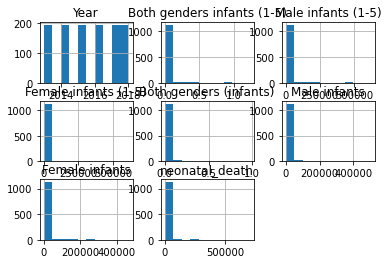

In [14]:
plt.figure(figsize = (15, 6))
death_data.hist()

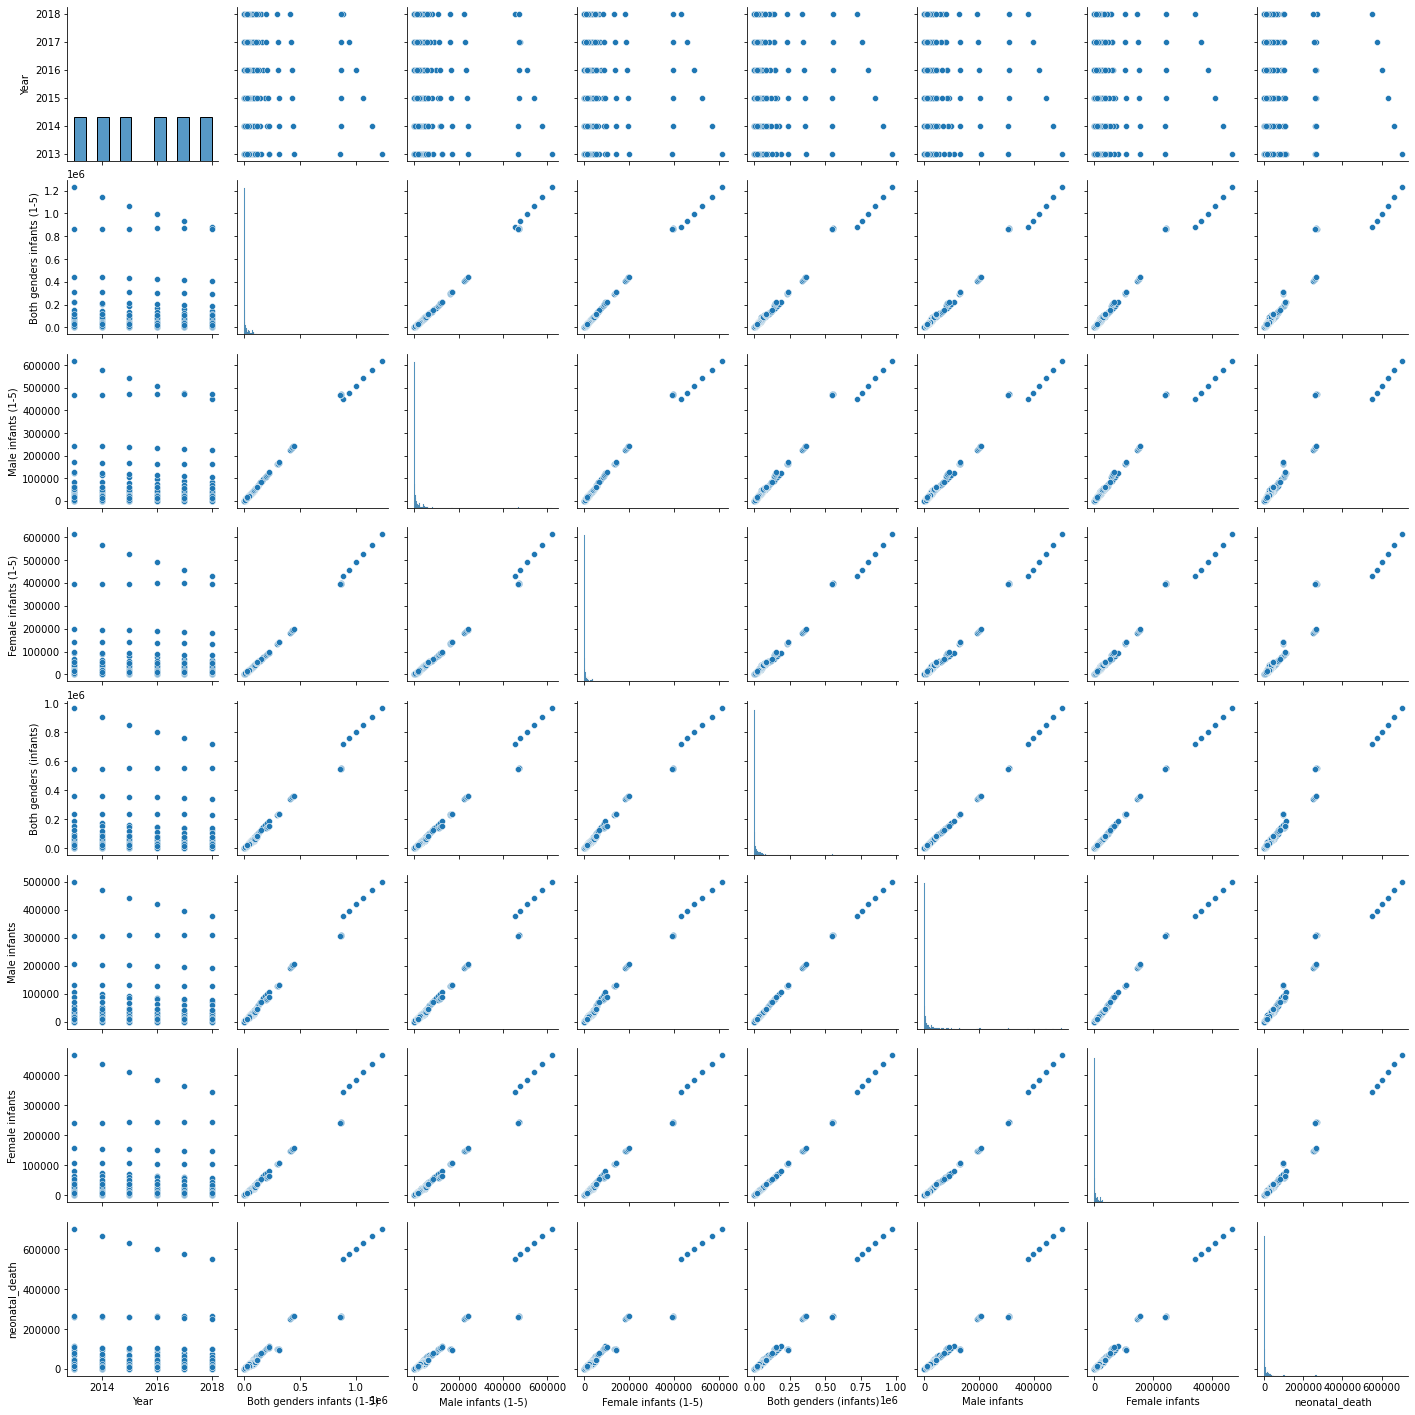

In [15]:
sns.pairplot(death_data)

In [16]:
correlation = death_data.corr()

<AxesSubplot:>

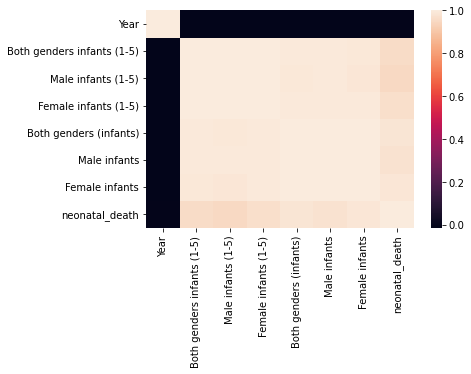

In [17]:
sns.heatmap(correlation)

### Conclusion: 
#### Variables are highly co-related. Thus, we can use either 'Both genders (Adults)' and 'Both genders (infants)' out of all the variables to train our model. This will avoid the overfitting of the model and a food accuracy score is possible.

In [18]:
from pandas_profiling import ProfileReport

In [19]:
death_report = ProfileReport(
    death_data,
    title="Total Morality EDA report"         
)
death_report.to_notebook_iframe()

In [20]:
death_report.to_file("Total Morality EDA report.html")

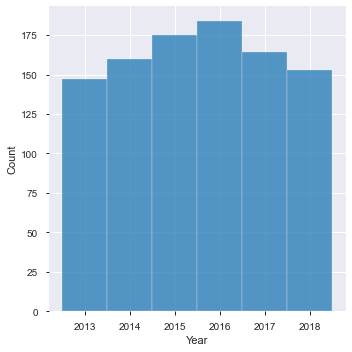

In [21]:
sns.displot(death_data.groupby(['Both genders infants (1-5)'])['Year'].mean(), discrete = True)

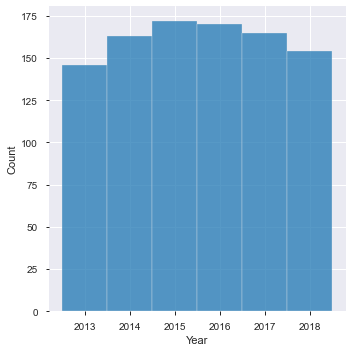

In [22]:
sns.displot(death_data.groupby(['Both genders (infants)'])['Year'].mean(), discrete = True)

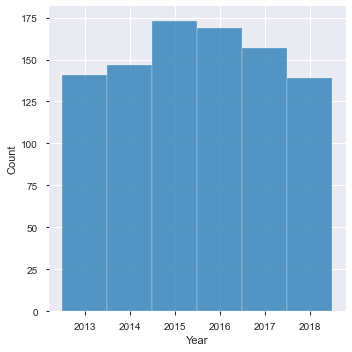

In [23]:
sns.displot(death_data.groupby(['Male infants (1-5)'])['Year'].mean(), discrete = True)

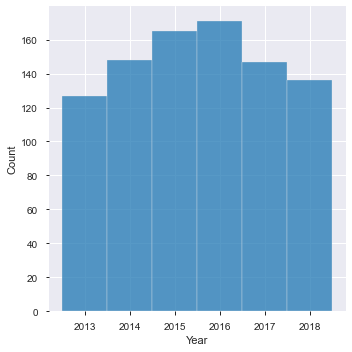

In [24]:
sns.displot(death_data.groupby(['Female infants (1-5)'])['Year'].mean(), discrete = True)

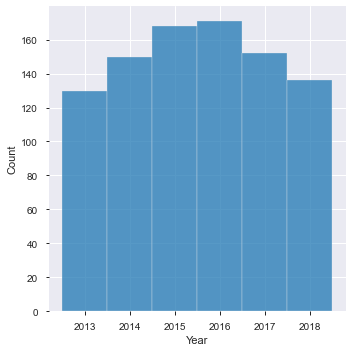

In [25]:
sns.displot(death_data.groupby(['Male infants'])['Year'].mean(), discrete = True)

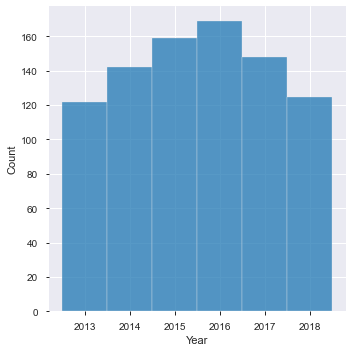

In [26]:
sns.displot(death_data.groupby(['Female infants'])['Year'].mean(), discrete = True)

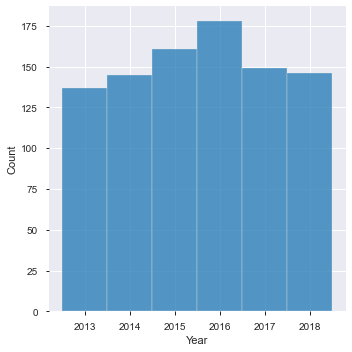

In [27]:
sns.displot(death_data.groupby(['neonatal_death'])['Year'].mean(), discrete = True)

In [28]:
def plot_outliers(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

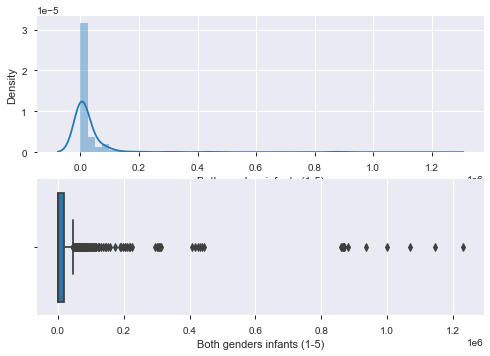

In [29]:
plot_outliers(death_data, "Both genders infants (1-5)")

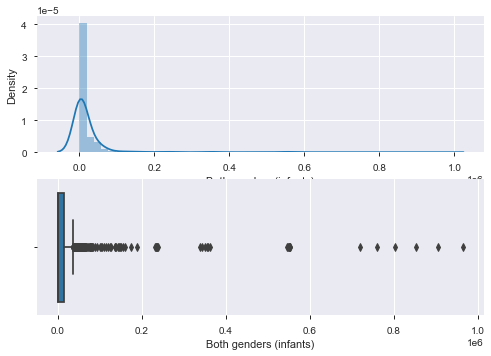

In [30]:
plot_outliers(death_data, "Both genders (infants)")

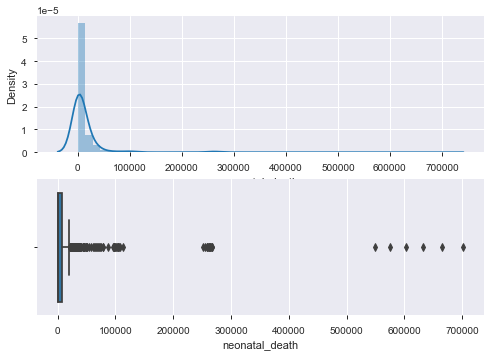

In [31]:
plot_outliers(death_data, "neonatal_death")

In [32]:
death_data['neonatal_death'] = np.where(death_data['neonatal_death'] >= 100000, death_data["neonatal_death"].median(), death_data["neonatal_death"])

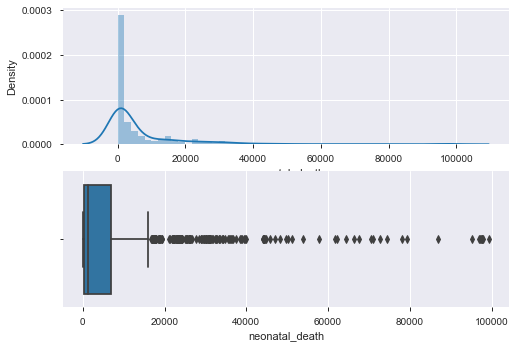

In [33]:
plot_outliers(death_data, "neonatal_death")

## Visualization results
1. The Variables that we use to visualize are much similar.
2. Thus to prepare a ML model out of these we can take either ofthe two columns as they are highly co-related through the heatmap.

In [34]:
categorical = [col for col in death_data.columns if death_data[col].dtype == 'O']

In [35]:
categorical

['Country']

In [36]:
countries = death_data[categorical]

In [37]:
countries

,Country
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
...,...
1160,Zimbabwe
1161,Zimbabwe
1162,Zimbabwe
1163,Zimbabwe


In [38]:
country_data = pd.get_dummies(countries, drop_first = True)

In [39]:
country_data

,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
death_data.drop('Country', axis = 1, inplace = True)

In [41]:
death_data.head()

,Year,Both genders infants (1-5),Male infants (1-5),Female infants (1-5),Both genders (infants),Male infants,Female infants,neonatal_death
1,2018,74278,40312,33966,57182,31394,25788,44725.0
2,2017,76877,41631,35246,58846,32244,26602,45771.0
3,2016,79770,43134,36636,60673,33222,27451,46963.0
4,2015,82918,44733,38185,62652,34257,28395,48237.0
5,2014,86378,46509,39869,64808,35410,29398,49715.0


In [42]:
data_list = [country_data, death_data]
new_data = pd.concat(data_list, axis = 1)

In [43]:
new_data.head()

,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_Zambia,Country_Zimbabwe,Year,Both genders infants (1-5),Male infants (1-5),Female infants (1-5),Both genders (infants),Male infants,Female infants,neonatal_death
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2018,74278,40312,33966,57182,31394,25788,44725.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2017,76877,41631,35246,58846,32244,26602,45771.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2016,79770,43134,36636,60673,33222,27451,46963.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2015,82918,44733,38185,62652,34257,28395,48237.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2014,86378,46509,39869,64808,35410,29398,49715.0


In [44]:
new_data.drop('Male infants (1-5)', axis = 1, inplace = True)
new_data.drop('Female infants (1-5)', axis = 1, inplace = True)
new_data.drop('Both genders (infants)', axis = 1, inplace = True)
new_data.drop('Male infants', axis = 1, inplace = True)
new_data.drop('Female infants', axis = 1, inplace = True)
new_data.drop('neonatal_death', axis = 1, inplace = True)

In [45]:
new_data.drop('Both genders infants (1-5)', axis = 1, inplace = True)

In [46]:
new_data.head()

,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2014


In [47]:
y1 = death_data['Both genders infants (1-5)']
y2  = death_data['neonatal_death']

In [48]:
y3 = death_data['Both genders (infants)']

In [49]:
X = new_data
X.shape

(1164, 194)

In [50]:
from sklearn.model_selection import train_test_split

## Implementing ML algorithms on (Both genders infants(1-5)) variable

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn import metrics
import pickle

In [54]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_1.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9948737015572241
predictions are: 
 [-1.96664514e+03  2.99613981e+02  7.55803951e+03  8.33528290e+04
  1.57500000e+01  8.27338951e+04  6.53500000e+02  1.28725000e+03
  2.00127034e+05  2.32719680e+03  1.30737371e+04  5.65884194e+03
  4.55519757e+03  5.48438704e+02  7.71989463e+03  2.07433887e+02
 -7.55237085e+02  7.36838948e+04  2.96331550e+03  2.38575482e+03
 -1.57639514e+03 -5.21544075e+02  3.58435258e+04  3.75072417e+03
  1.85228450e+03  2.46597417e+03  9.16294834e+02  1.93208948e+04
  1.02859194e+03 -2.11576368e+03 -1.13688450e+03  2.67247417e+03
 -1.59798278e+03  6.19352583e+03 -1.43502660e+03  4.40688450e+03
  3.22285916e+03 -4.10265987e+01  2.45307903e+03 -2.85005320e+03
  8.69776674e+05  1.77914914e+04  4.25335460e+05 -7.17484502e+02
 -1.98039514e+03  1.27802845e+04  5.32815345e+02  1.82609483e+03
  3.45832948e+04  1.63192097e+03  3.37144734e+04  1.15877500e+04
  5.75903258e+04  3.95242742e+04  1.85131611e+03 -1.29631611e+03
 -8.31553197e+02  1.52154408e+03 -2

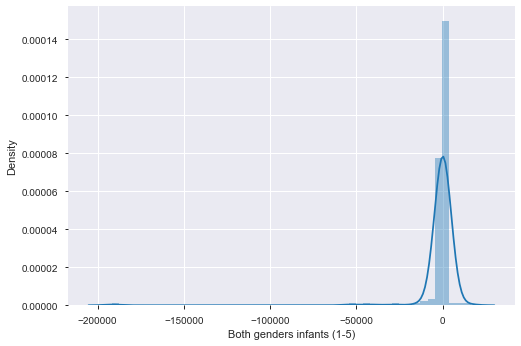

In [55]:
predict(LinearRegression(), 0)

Training score : 1.0
predictions are: 
 [8.30000e+01 5.95000e+02 7.74400e+03 8.81430e+04 1.60000e+01 8.31770e+04
 6.60000e+02 1.32800e+03 1.87591e+05 5.12100e+03 1.27350e+04 6.67200e+03
 3.71600e+03 1.00000e+00 8.30500e+03 1.39000e+03 4.65000e+02 7.50850e+04
 4.23800e+03 1.94000e+02 4.65000e+02 4.77000e+02 3.79360e+04 1.37000e+03
 4.25000e+02 3.00000e+00 4.49000e+02 1.97350e+04 1.82300e+03 4.88000e+02
 3.26000e+02 2.17000e+02 4.00000e+01 7.86400e+03 2.00000e+00 3.54500e+03
 5.39400e+03 1.36200e+03 2.08700e+03 2.40000e+01 8.63618e+05 2.01050e+04
 4.32306e+05 7.37000e+02 6.60000e+01 1.17220e+04 2.81900e+03 1.41200e+03
 3.46780e+04 1.99800e+03 3.31930e+04 1.17760e+04 5.68330e+04 3.88880e+04
 2.17000e+02 3.37000e+02 1.99800e+03 4.84000e+02 1.33000e+02 4.83600e+03
 2.17000e+02 5.00000e+02 2.80000e+01 2.74900e+03 1.20000e+01 8.83500e+03
 5.90000e+01 3.70000e+01 2.00000e+00 5.85250e+04 1.11470e+04 4.95300e+03
 2.53400e+03 1.85000e+02 1.60000e+01 3.72000e+02 4.52040e+04 7.22000e+02
 2.01050e+0

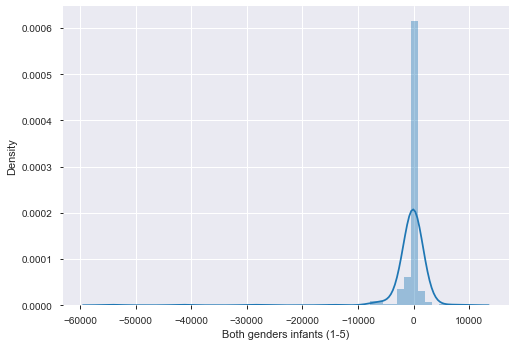

In [56]:
predict(DecisionTreeRegressor(), 1)

Training score : 0.9865670300957831
predictions are: 
 [ 41539.61  39941.53  15138.93  87542.55  36705.89  82077.03  35061.94
  45826.4  186585.22  37050.11  16902.79  31943.46  43485.03  40601.72
  22776.47  44839.97  47164.68  73620.82  41276.01  50132.11  51534.47
  44800.31  38036.68  50679.42  39014.8   51362.35  32518.63  20124.58
  43565.32  37972.62  41599.56  50123.36  43834.12  14180.43  39214.42
  46761.73  35006.01  44156.11  51254.93  40868.04 857828.12  19576.61
 411826.51  40958.11  36421.59  13106.76  42057.6   36954.77  34515.52
  42639.77  33556.45  12891.29  57177.67  38225.97  35716.71  43132.58
  45382.22  39088.48  34951.12  34491.15  51371.41  40126.69  45059.79
  48203.77  39740.39  32434.27  39756.76  46863.51  43058.22  59899.
  12328.47  36016.51  43704.76  34960.05  49562.24  44678.38  45138.82
  50554.14  20586.44  35464.37  35912.85  13971.68  29910.71  48711.22
  15981.74  25447.38  38708.69  45667.44  47788.85  50973.69  31221.33
  17965.66  51219.68  28

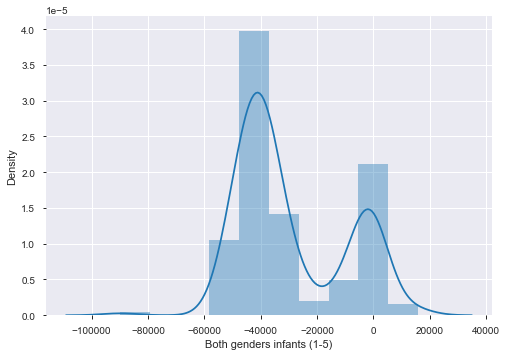

In [57]:
predict(RandomForestRegressor(), 0)

## Implementing ML algotithms on (Neonatal deaths) variable

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2)

In [59]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_2.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9483448095695529
predictions are: 
 [ 1.14916509e+02  7.12005670e+03  6.89140723e+01  1.07378349e+03
  1.16188994e+02  3.04706835e+04 -9.97165094e+01 -3.95262186e+01
  1.73706194e+04 -3.55485456e+01  2.18654330e+03  1.65823884e+03
  2.25321651e+03  1.37436567e+04  1.00716509e+02  2.21997767e+03
  1.96174109e+02  2.18468349e+03 -6.59709121e+00  1.73373806e+04
  8.03254240e+03  9.67477009e+03 -4.02299057e+01  1.95223952e+02
  1.96451454e+02  2.55962991e+03 -1.73433019e+01  1.54543583e+04
  1.44156800e+02  1.63625670e+03 -8.76368973e+01  7.67869418e+02
  6.95505971e+03  4.05116509e+02  3.65963690e+03  2.95890618e+02
  1.75683491e+02  3.16134330e+03  1.12741295e+03  2.15350000e+03
 -3.36299057e+01  1.07003701e+04  1.72376641e+04  3.18834906e+01
  6.24822991e+03  3.96543302e+02  4.42716509e+02  1.04054465e+03
  4.97970094e+02  2.57874299e+04  1.32071651e+03  1.45462788e+02
  4.23003349e+03  7.93282589e+03  1.47861701e+04  3.53522327e+02
  4.45000000e+01  2.87044654e+02  4

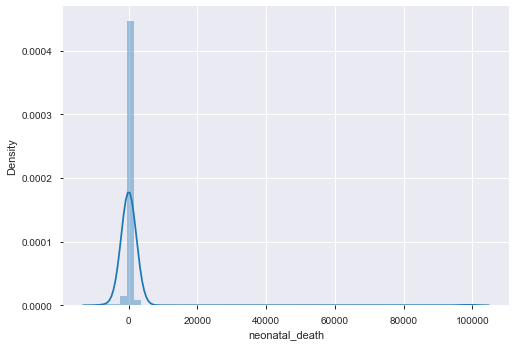

In [60]:
predict(LinearRegression(), 1)

Training score : 0.7287739451316195
predictions are: 
 [3.0227230e+04 9.0932200e+03 2.9981180e+04 2.8301920e+04 2.4290720e+04
 2.9712490e+04 2.5500890e+04 2.8191320e+04 2.0152590e+04 2.2545850e+04
 1.1462600e+03 6.9069000e+02 3.2058260e+04 1.3769350e+04 2.8175810e+04
 6.7696000e+02 2.1126360e+04 2.5586120e+04 2.6406900e+04 1.4451290e+04
 1.3755000e+04 8.9146600e+03 1.7405330e+04 3.0242390e+04 2.3111480e+04
 2.3669380e+04 2.1605800e+04 1.5875320e+04 2.9208660e+04 2.2339100e+04
 2.5501340e+04 2.2695000e+02 6.9688300e+03 3.0787730e+04 2.0061690e+04
 3.3363980e+04 2.7773590e+04 2.2224400e+03 2.3775210e+04 2.1269190e+04
 1.7405340e+04 1.0060100e+04 1.8198960e+04 2.7305290e+04 7.3318200e+03
 1.7565000e+02 3.1301570e+04 3.0880315e+04 2.2583410e+04 2.5916550e+04
 3.2914150e+04 2.9205110e+04 1.5156200e+04 1.0417690e+04 1.4835430e+04
 2.6917380e+04 2.5880000e+01 3.0877130e+04 4.3570900e+03 1.0677040e+04
 3.7059100e+03 2.7922850e+04 3.0236210e+04 1.1278470e+04 1.8778120e+04
 2.9081170e+04 3.08697

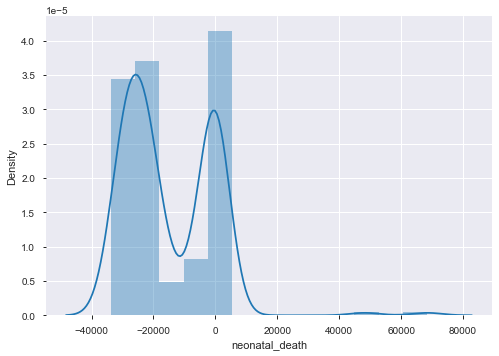

In [61]:
predict(RandomForestRegressor(), 0)

Training score : 1.0
predictions are: 
 [1.9000e+01 7.1610e+03 1.8100e+02 1.1735e+03 1.4500e+02 2.9369e+04
 0.0000e+00 5.5000e+01 1.7708e+04 6.0000e+00 2.0920e+03 5.0000e+00
 4.9715e+04 1.3926e+04 1.0000e+00 5.0000e+00 2.1800e+02 2.1300e+03
 7.2000e+01 1.7000e+04 9.0050e+03 9.2290e+03 2.0000e+01 1.2300e+02
 2.2600e+02 2.9350e+03 2.0000e+00 1.5510e+04 5.2000e+01 1.7030e+03
 1.0000e+00 5.0000e+00 7.5170e+03 5.1219e+04 3.6200e+03 4.9715e+04
 2.6200e+02 3.2990e+03 1.1130e+03 2.1570e+03 2.6000e+01 1.0235e+04
 1.7000e+04 1.1700e+02 6.8090e+03 5.0000e+00 5.1219e+04 4.4725e+04
 5.4600e+02 2.5335e+04 5.1219e+04 3.4000e+01 3.8270e+03 9.0050e+03
 1.4845e+04 4.6963e+04 5.0000e+00 4.4725e+04 4.8970e+03 1.0495e+04
 4.2970e+03 1.3280e+03 8.0000e+01 4.0240e+03 2.3000e+01 2.9000e+01
 4.4725e+04 5.3000e+01 5.0000e+00 2.4199e+04 5.0000e+00 4.4725e+04
 2.6298e+04 3.3389e+04 5.0000e+00 3.7000e+01 1.4500e+02 1.7000e+01
 6.1592e+04 1.4720e+03 5.3960e+03 2.2205e+04 5.0000e+00 6.0000e+00
 5.1219e+04 4.4290e+03

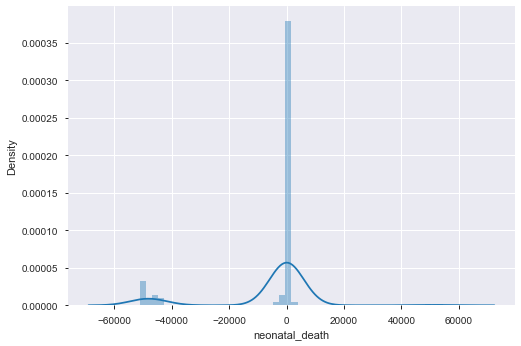

In [62]:
predict(DecisionTreeRegressor(), 0)

## Implementing ML algotithms on (Both genders (infants)) variable


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size = 0.2)

In [64]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_3.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9917248585510485
predictions are: 
 [ 3.98524130e+02 -7.05381594e+02  1.21804826e+03  1.96377927e+03
  1.98552193e+01  6.00299448e+04 -1.48512065e+02  4.19682753e+02
  9.33310325e+02  3.85222896e+03  9.15702413e+03  2.75655121e+04
  1.39868687e+03  1.49533446e+03 -1.31428687e+03 -1.82534478e+03
  7.72048687e+03  1.24808345e+04  6.82371044e+02  2.37213272e+03
  2.17279826e+03  1.67356293e+04  1.14067632e+04 -1.95563272e+03
  2.98514478e+03  1.29517398e+01  1.85962065e+03  2.92965685e+03
 -2.65365507e+02  3.28990000e+04  7.56000000e+02 -2.29466891e+03
  2.07062065e+03  4.86521448e+04 -3.44524130e+02  5.02288687e+03
  1.21706033e+03  5.54933169e+05 -2.11741891e+03  3.10741891e+03
  6.55593154e+02 -2.20834478e+03  2.61068224e+04  1.39133793e+04
  5.19113103e+04  9.38919566e+02 -1.85562065e+03 -1.55162065e+03
  1.44356033e+03  6.44157104e+03  1.33758446e+03  2.60794155e+04
  2.47656033e+03  2.44294478e+03 -1.97247811e+03  2.69466667e+03
  3.58706033e+03  5.53447072e+05  8

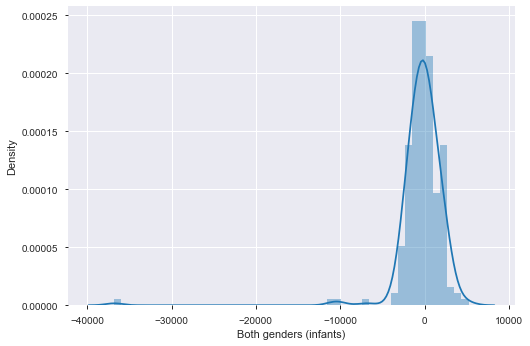

In [65]:
predict(LinearRegression(), 0)

Training score : 0.9825788344759587
predictions are: 
 [3.0080590e+04 2.4892270e+04 3.4508270e+04 3.5051650e+04 7.1698000e+02
 5.9817580e+04 2.6106510e+04 3.1590210e+04 2.9167500e+04 2.4787950e+04
 1.2101780e+04 2.8120220e+04 2.7893550e+04 3.4400290e+04 3.5903180e+04
 1.0380000e+02 1.6774870e+04 1.4067450e+04 2.8899040e+04 3.8337380e+04
 3.5361280e+04 1.7933510e+04 1.7059050e+04 2.9730000e+01 4.2358430e+04
 4.0163990e+04 3.6940430e+04 3.8377950e+04 3.4795830e+04 3.3716330e+04
 3.5283270e+04 3.9433450e+04 3.4964970e+04 4.7931650e+04 2.9740320e+04
 2.7691380e+04 2.7671640e+04 4.7137440e+05 6.2700000e+01 4.5015350e+04
 9.5331000e+02 1.7060000e+01 2.5648170e+04 1.6700210e+04 5.2575090e+04
 3.9364780e+04 1.3250000e+01 3.3996290e+04 2.7110310e+04 9.3850800e+03
 2.9178880e+04 2.8228800e+04 3.2380710e+04 3.6313700e+04 5.6340000e+01
 3.4043230e+04 3.3851570e+04 4.7091890e+05 3.0799240e+04 2.7886560e+04
 3.5814440e+04 3.2893760e+04 3.6996420e+04 1.9360000e+01 2.1091310e+04
 3.4933920e+04 3.08089

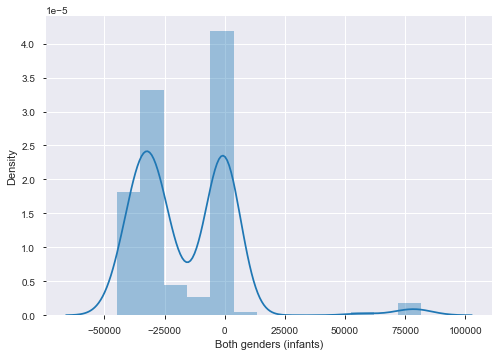

In [66]:
predict(RandomForestRegressor(), 1)

Training score : 1.0
predictions are: 
 [2.50000e+01 3.80000e+01 5.40000e+02 2.51000e+02 7.00000e+00 6.16050e+04
 3.80000e+01 1.68000e+02 5.00000e+00 3.42000e+03 9.01400e+03 2.78330e+04
 7.30000e+01 2.14000e+02 2.00000e+01 7.00000e+00 6.62300e+03 1.22560e+04
 1.14300e+03 3.41000e+02 1.39900e+03 1.79800e+04 8.52200e+03 7.00000e+00
 7.71000e+02 7.71000e+02 2.00000e+00 5.31000e+02 2.43000e+02 3.38060e+04
 7.71000e+02 3.04000e+02 2.08000e+02 4.85500e+04 3.00000e+01 3.91400e+03
 3.18000e+02 5.52981e+05 7.00000e+00 5.56000e+02 7.00000e+00 7.00000e+00
 2.51410e+04 1.53890e+04 5.34900e+04 2.19400e+03 7.00000e+00 3.04000e+02
 5.31000e+02 6.95300e+03 4.10000e+01 2.74660e+04 1.69700e+03 2.29000e+02
 7.00000e+00 2.68500e+03 2.82000e+03 5.52981e+05 3.79000e+02 1.04000e+03
 3.54100e+04 1.45100e+03 3.02000e+02 7.00000e+00 2.07590e+04 4.50000e+01
 3.10840e+04 2.40000e+01 7.71000e+02 1.34000e+02 1.73000e+02 7.65500e+03
 7.75500e+03 5.96100e+03 2.61000e+02 3.50900e+03 1.00410e+04 5.23120e+04
 1.55710e+0

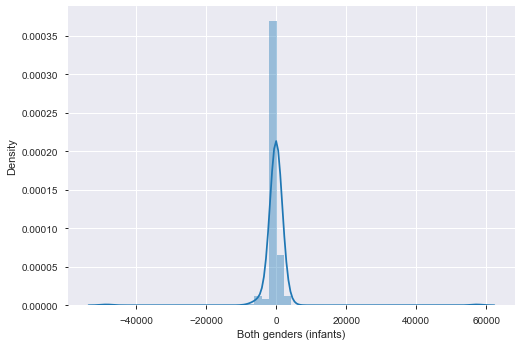

In [67]:
predict(DecisionTreeRegressor(), 0)

## Conclusion:
### Thus while implementing the models, we have derieved the following insights:
#### 1. The Random Forest regressor model's evaluation metrics are <u>very much irrelevant</u> but training score is good.
#### 2. The linear Regression is the best fit model for all three variables (Both genders infants (1-5), Both genders infants, neonatal deaths) as the <u>*evaluation metrics and training score is excellent.*</u>
#### 3. Distribution plots of Random forest are somewhat unstable while other two algorithms show a greater stability.
#### 4. From the predictions we can conclude that infants that are between 0 and 1 have shown a satisfactory survival capacity as compared to previous times. The neonatal deaths (per thousands) seem to have exceptionally decreased. 

